In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.lines import Line2D
import urllib
from urllib.error import HTTPError

%matplotlib inline

## Skrypt z wykładu

### Input data

In [72]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


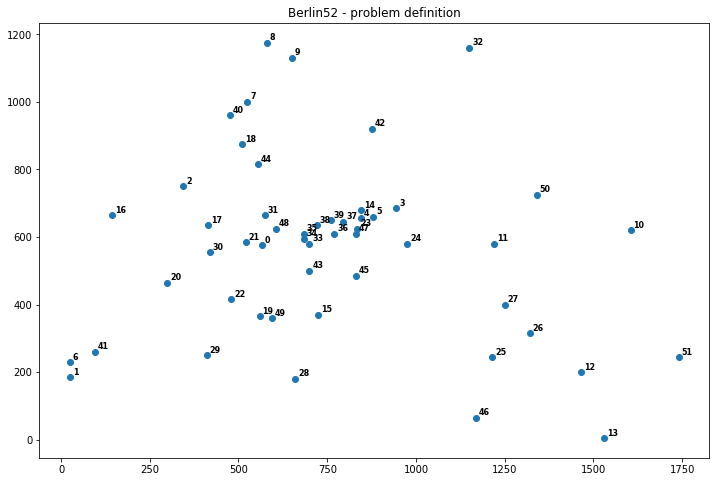

In [73]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

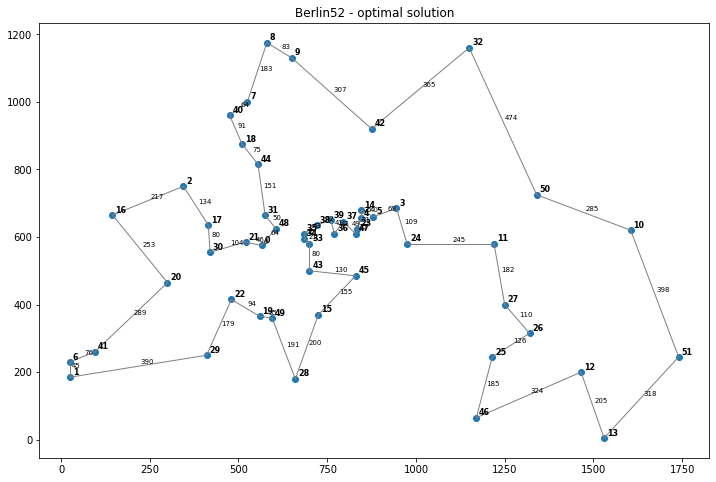

In [74]:
route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

### Objective function

In [64]:
def tsp_objective_function(p, dist_matrix=A):
    s = 0.0
    n = len(p)
    for i in range(n):
        s += dist_matrix[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


### Random Sampling

In [19]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

52.566320180892944
21271.71980548639 [24  1 38 32 42 36 37 39 23 47 14  4 44  0  6 15 49  5 21  3  8 16 29 22
 11 45 28 20 48 35 34 31 33  9  7 17 40 41 12 10 18 30 19  2 43 50 51 13
 27 25 26 46]


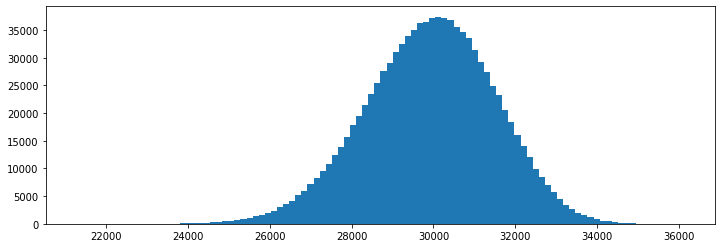

29914.82547374702 1576.3818929978227


In [20]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

### Simulated Annealing

In [7]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [75]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

37.13037467002869 9561.218953329853


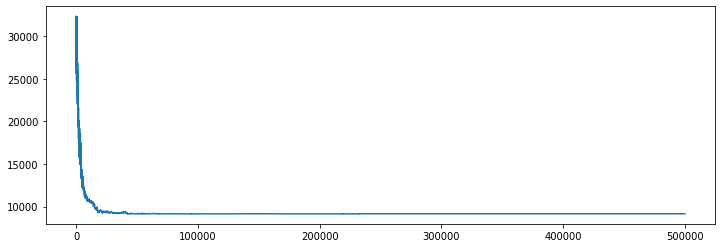

In [11]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### SGA-PMX

![](https://i.imgur.com/WALBpI8.png)

In [8]:
def PMX(ind1, ind2):
    n = len(ind1)
    a,b = np.random.randint(0,n,2)
    if a>b:
        a,b=b,a
    
    child1_elements,child2_elements = set(ind2[a:b+1]),set(ind1[a:b+1])
    lookup1,lookup2 = np.ones(n,dtype=np.int)*-1,np.ones(n,dtype=np.int)*-1
    for i in range(n):
        lookup1[ind1[i]] = i
        lookup2[ind2[i]] = i
    
    child1 = np.copy(ind1)
    child2 = np.copy(ind2)
    child1[a:b+1] = ind2[a:b+1]
    child2[a:b+1] = ind1[a:b+1]
    
    
    for i in range(n):
        if i<a or i>b:
            while child1[i] in child1_elements:
                child1[i] = ind1[lookup2[child1[i]]]
            while child2[i] in child2_elements:
                child2[i] = ind2[lookup1[child2[i]]]
                
    return child1, child2

In [9]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [81]:
def SGA(
    population_size = 500,
    chromosome_length = 52,
    number_of_offspring = 500,
    crossover_probability = 0.95,
    mutation_probability = 0.25,
    number_of_iterations = 250,
    mutation = reverse_sequence_mutation,
    dist_matrix = A,
    objective_function = tsp_objective_function,
    crossover = PMX
):
    
    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    history = []

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objective_function(current_population[i, :], dist_matrix)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objective_function(children_population[i, :], dist_matrix)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        history.append([objective_values.min(), objective_values.mean(), objective_values.max()])
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        if not t%10:
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
            
    return history, best_objective_value, best_chromosome

## Zadanie 1. (6 punktów)
Przypomnij sobie algorytm Simple Genetic Algorithm (SGA) i operator krzyżowania PMX,
a następnie zapoznaj się ze skryptem Pythona umieszczonym w materiałach do wykładu.
Przedstawia on zastosowanie algorytmu SGA-PMX do rozwiązywania problemu
komiwojażera. Następnie:

#### a) 
uzupełnij skrypt o usuniętą implementację operatora PMX

#### b)
uruchom skrypt dla instancji Berlin52 i porównaj wyniki umieszczonych w nim trzech
metod rozwiązywania problemu (obliczenia powtórz kilkukrotnie)

Minimum values from a few runs:
- Random Sampling: 20861.072
- Simulated Annealing: 8728.997
- SGA-PMX: 7753.194

#### c)
zrób wykres zmian wartości funkcji celu w kolejnych iteracjach algorytmu ewolucyjnego,
podobny do wykresu dla symulowanego wyżarzania

In [25]:
history, best_objective_value, best_chromosom = SGA(mutation=reverse_sequence_mutation)

  0     0.09673572 24633.45440111 28607.33343325 29806.99083223 979.43080580
 10     0.76302576 19338.14656273 22051.75708984 22724.22510813 579.10294614
 20     1.45121431 14921.63080493 18324.32164696 19041.30339917 657.71821167
 30     2.11682940 13298.11363272 14157.51261547 14523.15432446 236.36917632
 40     2.76609325 11942.61018426 12599.95660893 12791.03320951 159.96425629
 50     3.36618376 10727.46217125 11286.45579787 11394.38246905 111.65706186
 60     3.96209097 9965.97003034 10314.30155124 10348.23421070  55.90724441
 70     4.55800271 9297.16771407 9544.57913024 9625.14075537  56.05740008
 80     5.15003157 8910.07438260 9028.34568276 9029.32838346   8.17742177
 90     5.76036811 8764.50174712 8793.68273888 8834.20919182  29.39087966
100     6.36606884 8429.25398831 8491.07202749 8495.21143217  14.29677538
110     6.95150280 8389.99572010 8389.99572010 8389.99572010   0.00000000
120     7.51505733 8370.36147018 8375.75510101 8389.99572010   8.75400709
130     8.08661270

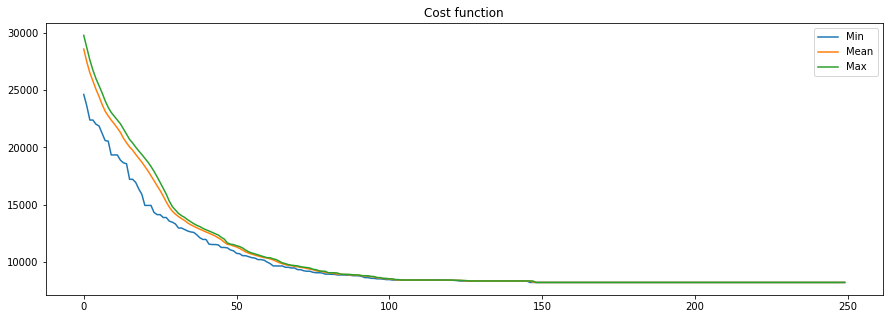

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

#### d)
zamiast mutacji Reverse Sequence Mutation spróbuj użyć mutacji polegającej na
transpozycji losowo wybranych dwóch elementów permutacji

In [10]:
def random_swap(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i],q[j] = q[j], q[i]
    return q

In [99]:
history, best_objective_value, best_chromosom = SGA(mutation=random_swap)

  0     0.08081460 24656.63853683 28478.24184425 29822.82329579 1013.35984660
 10     0.63433242 20554.49702711 22729.20334246 23469.40070883 574.63869078
 20     1.18087173 17679.03185411 19609.05646009 20230.55038096 507.55002283
 30     1.71149540 15100.98489163 16329.97086072 17140.70933088 468.71507190
 40     2.19632387 13527.00891061 14111.92126429 14301.03492481 124.00187828
 50     2.69701600 12797.87776988 13121.13350282 13233.67697860 109.70844322
 60     3.20232248 12034.41371875 12283.17301568 12328.87599383  43.37932092
 70     3.70062828 11374.59475553 11751.60968621 11872.15855088  69.03124386
 80     4.21776175 11166.44347572 11251.88060802 11260.97273704  13.59070477
 90     4.70842552 11055.21147265 11064.28171918 11091.77348377  15.75030060
100     5.20326996 10707.79453719 10733.97925481 10734.03587774   1.17583187
110     5.69844961 10684.01688040 10695.12420076 10695.14645992   0.49723195
120     6.17224979 10433.44167296 10439.97621141 10439.98930667   0.2925261

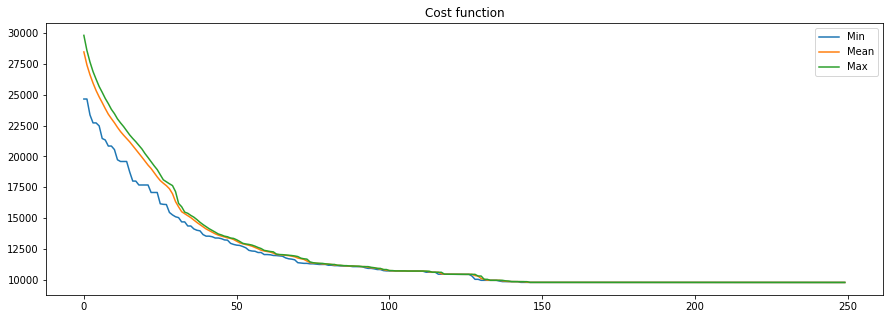

In [100]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

#### e)
sprawdź działanie algorytmu na innych instancjach problemu komiwojażera (co najmniej
bayg29, bays29, kroA100, kroA150, kroA200)

##### bayg29

In [17]:
def bayg29():
    dists = '''97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145
    129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
    219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
    167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
    51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
    279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
    178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
    169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
    172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
    140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
    320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
    174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
    144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
    61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
    106 110  56  49  91 153  91 197 136  94 225 151 201 205
    215 159  64 126 128 190  98  53  78 218  48 127 214
    61 155 157 235  47 305 243 186 282 261 300 252
    105 100 176  66 253 183 146 231 203 239 204
    113 152 127 150 106  52 235 112 179 221
    79 163 220 119 164 135 152 153 114
    236 201  90 195  90 127  84  91
    273 226 148 296 238 291 269
    112 130 286  74 155 291
    130 178  38  75 180
    281 120 205 270
    213 145  36
    94 217
    162'''

    n = 29
    A = np.zeros((n, n))
    A[np.triu_indices(n, k=1)] = np.array([float(x) for x in dists.split()])
    A += A.T
    return A, n, 'bayg29'

In [18]:
dist_matrix, n, name = bayg29()
history, best_objective_value, best_chromosom = SGA(chromosome_length=n, number_of_iterations=200, dist_matrix=dist_matrix)

  0     0.06948280 3697.00000000 4443.32000000 4694.00000000 202.44648083
 10     0.60807633 2791.00000000 3247.37600000 3405.00000000 124.56549532
 20     1.10776567 2407.00000000 2656.40400000 2745.00000000  71.44951213
 30     1.55556941 1920.00000000 2092.92400000 2138.00000000  37.46206380
 40     1.97822046 1759.00000000 1831.49400000 1845.00000000  12.39491686
 50     2.40222335 1620.00000000 1620.00000000 1620.00000000   0.00000000
 60     2.81674480 1620.00000000 1620.00000000 1620.00000000   0.00000000
 70     3.22369003 1620.00000000 1620.00000000 1620.00000000   0.00000000
 80     3.64407682 1620.00000000 1620.00000000 1620.00000000   0.00000000
 90     4.07543898 1620.00000000 1620.00000000 1620.00000000   0.00000000
100     4.49033380 1620.00000000 1620.00000000 1620.00000000   0.00000000
110     4.92217708 1620.00000000 1620.00000000 1620.00000000   0.00000000
120     5.34152722 1620.00000000 1620.00000000 1620.00000000   0.00000000
130     5.80329561 1620.00000000 1620.

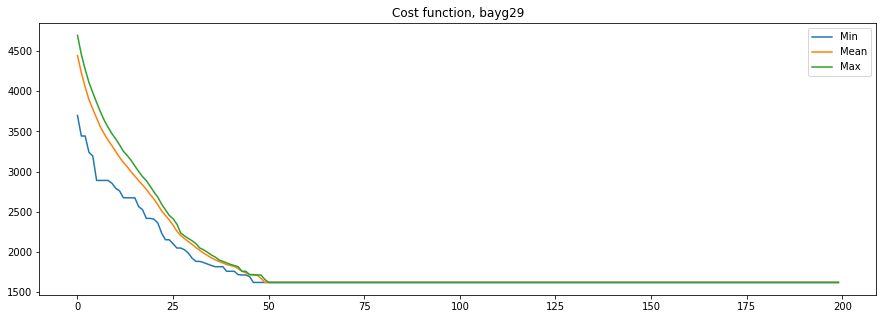

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title(f'Cost function, {name}')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

##### bays29

In [20]:
def bays29():
    dists = '''0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276 188 150  65 341 184  67 221 169 108  45 167
    107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199 182  67  42 278 271 146 251 105 191 139  79
    241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356 355 204 182 435 417 292 424 116 337 273  77
    190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86  68  70 137 151 239 135 137 242 165 228 205
    124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287 238 155  65 366 300 175 307  57 220 121  97
    80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296 232 164  85 375 249 147 301 118 188  60 185
    316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266 154 282 321 298 168 249  95 437 190 314 435
    76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289 177 216 141 346 108  57 190 245  43  81 243
    152 134 217 248  46  72 438 213   0 206 365  89 209 368 286 278 360 333 284 201 111 412 321 221 353  72 266 132 111
    157  95 232  42 160 167 254 188 206   0 159 220  57 149  80 132 193 127 100  28  95 193 241 131 169 200 161 189 163
    283 254 491 117 319 351 202 272 365 159   0 404 176 106  79 161 165 141  95 187 254 103 279 215 117 359 216 308 322
    133 180 312 287 112  55 439 193  89 220 404   0 210 384 325 279 415 349 285 217 138 428 310 200 354 169 241 112 238
    113 101 280  79 163 157 235 131 209  57 176 210   0 186 117  75 231 165  81  85  92 230 184  74 150 208 104 158 206
    297 234 391 107 322 331 254 302 368 149 106 384 186   0  69 191  59  35 125 167 255  44 309 245 169 327 246 335 288
    228 175 412  38 240 272 210 233 286  80  79 325 117  69   0 122 122  56  56 108 175 113 240 176 125 280 177 266 243
    129 176 349 121 232 226 187  98 278 132 161 279  75 191 122   0 244 178  66 160 161 235 118  62  92 277  55 155 275
    348 265 422 152 314 362 313 344 360 193 165 415 231  59 122 244   0  66 178 198 286  77 362 287 228 358 299 380 319
    276 199 356  86 287 296 266 289 333 127 141 349 165  35  56 178  66   0 112 132 220  79 296 232 181 292 233 314 253
    188 182 355  68 238 232 154 177 284 100  95 285  81 125  56  66 178 112   0 128 167 169 179 120  69 283 121 213 281
    150  67 204  70 155 164 282 216 201  28 187 217  85 167 108 160 198 132 128   0  88 211 269 159 197 172 189 182 135
    65  42 182 137  65  85 321 141 111  95 254 138  92 255 175 161 286 220 167  88   0 299 229 104 236 110 149  97 108
    341 278 435 151 366 375 298 346 412 193 103 428 230  44 113 235  77  79 169 211 299   0 353 289 213 371 290 379 332
    184 271 417 239 300 249 168 108 321 241 279 310 184 309 240 118 362 296 179 269 229 353   0 121 162 345  80 189 342
    67 146 292 135 175 147 249  57 221 131 215 200  74 245 176  62 287 232 120 159 104 289 121   0 154 220  41  93 218
    221 251 424 137 307 301  95 190 353 169 117 354 150 169 125  92 228 181  69 197 236 213 162 154   0 352 147 247 350
    169 105 116 242  57 118 437 245  72 200 359 169 208 327 280 277 358 292 283 172 110 371 345 220 352   0 265 178  39
    108 191 337 165 220 188 190  43 266 161 216 241 104 246 177  55 299 233 121 189 149 290  80  41 147 265   0 124 263
    45 139 273 228 121  60 314  81 132 189 308 112 158 335 266 155 380 314 213 182  97 379 189  93 247 178 124   0 199
    167  79  77 205  97 185 435 243 111 163 322 238 206 288 243 275 319 253 281 135 108 332 342 218 350  39 263 199   0'''

    n = 29
    A = np.fromstring(dists, sep=' ').reshape((n, n))
    return A, n, 'bays29'

In [21]:
dist_matrix, n, name = bays29()
history, best_objective_value, best_chromosom = SGA(chromosome_length=n, number_of_iterations=100, dist_matrix=dist_matrix)

  0     0.08177876 4839.00000000 5606.27000000 5929.00000000 239.08528416
 10     0.56352925 3222.00000000 3971.47800000 4228.00000000 205.24132507
 20     1.07567406 2548.00000000 2855.26800000 2965.00000000  85.04580046
 30     1.48751330 2230.00000000 2335.26800000 2386.00000000  26.76640013
 40     1.92430878 2099.00000000 2126.22000000 2147.00000000  17.82244652
 50     2.37111497 2090.00000000 2090.00000000 2090.00000000   0.00000000
 60     2.83245420 2090.00000000 2090.00000000 2090.00000000   0.00000000
 70     3.28524303 2090.00000000 2090.00000000 2090.00000000   0.00000000
 80     3.73712873 2090.00000000 2090.00000000 2090.00000000   0.00000000
 90     4.17941236 2090.00000000 2090.00000000 2090.00000000   0.00000000


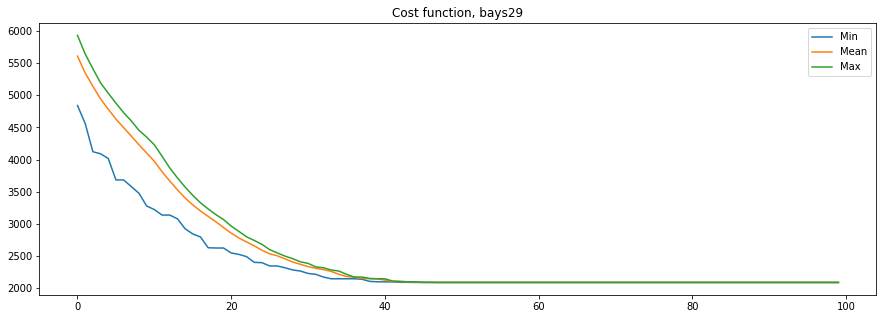

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title(f'Cost function, {name}')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

##### kroA100

In [23]:
def kroA100():
    coords = '''1380 939
    2848 96
    3510 1671
    457 334
    3888 666
    984 965
    2721 1482
    1286 525
    2716 1432
    738 1325
    1251 1832
    2728 1698
    3815 169
    3683 1533
    1247 1945
    123 862
    1234 1946
    252 1240
    611 673
    2576 1676
    928 1700
    53 857
    1807 1711
    274 1420
    2574 946
    178 24
    2678 1825
    1795 962
    3384 1498
    3520 1079
    1256 61
    1424 1728
    3913 192
    3085 1528
    2573 1969
    463 1670
    3875 598
    298 1513
    3479 821
    2542 236
    3955 1743
    1323 280
    3447 1830
    2936 337
    1621 1830
    3373 1646
    1393 1368
    3874 1318
    938 955
    3022 474
    2482 1183
    3854 923
    376 825
    2519 135
    2945 1622
    953 268
    2628 1479
    2097 981
    890 1846
    2139 1806
    2421 1007
    2290 1810
    1115 1052
    2588 302
    327 265
    241 341
    1917 687
    2991 792
    2573 599
    19 674
    3911 1673
    872 1559
    2863 558
    929 1766
    839 620
    3893 102
    2178 1619
    3822 899
    378 1048
    1178 100
    2599 901
    3416 143
    2961 1605
    611 1384
    3113 885
    2597 1830
    2586 1286
    161 906
    1429 134
    742 1025
    1625 1651
    1187 706
    1787 1009
    22 987
    3640 43
    3756 882
    776 392
    1724 1642
    198 1810
    3950 1558'''

    n = 100
    coords = np.fromstring(coords, sep=' ')
    coords = coords.reshape((n, 2))

    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    return A, n, 'kroA100'

In [24]:
dist_matrix, n, name = kroA100()
history, best_objective_value, best_chromosom = SGA(chromosome_length=n, number_of_iterations=500, dist_matrix=dist_matrix)

  0     0.16253757 146453.29676152 163919.43953860 170128.64523885 4835.98980694
 10     1.35069466 121745.04689924 131613.42458103 135570.61263660 3101.17575085
 20     2.53525138 105529.84116575 112998.47474391 115506.20511332 2166.69495990
 30     3.73548079 98173.06145542 103817.27015113 105709.20856611 1488.94567924
 40     4.87319779 86985.39067805 92319.11539394 93742.87570986 1160.81661884
 50     5.90011883 76902.95382525 81149.54532405 82696.04839550 1106.55788587
 60     6.89032555 67810.06328815 71661.75101138 72931.61259026 939.58854594
 70     7.86081648 60983.71378032 64379.95958738 65640.25832612 1069.13108947
 80     8.89411306 56020.26020950 56849.04484449 57436.38577316 337.31220790
 90     9.91481042 51294.52772649 53145.99761946 53620.92108558 376.84059995
100    10.90097094 48050.25403944 49618.72402383 50015.56204481 324.42877225
110    11.87281632 44180.92906736 46476.62002183 46963.35743092 401.46528383
120    13.01093221 42163.25340787 43120.06398729 43506.860

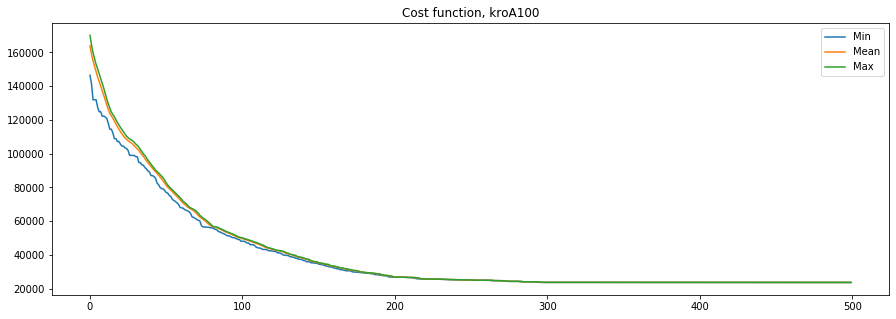

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title(f'Cost function, {name}')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

##### kroA150

In [10]:
def kroA150():
    coords = '''1380 939
    2848 96
    3510 1671
    457 334
    3888 666
    984 965
    2721 1482
    1286 525
    2716 1432
    738 1325
    1251 1832
    2728 1698
    3815 169
    3683 1533
    1247 1945
    123 862
    1234 1946
    252 1240
    611 673
    2576 1676
    928 1700
    53 857
    1807 1711
    274 1420
    2574 946
    178 24
    2678 1825
    1795 962
    3384 1498
    3520 1079
    1256 61
    1424 1728
    3913 192
    3085 1528
    2573 1969
    463 1670
    3875 598
    298 1513
    3479 821
    2542 236
    3955 1743
    1323 280
    3447 1830
    2936 337
    1621 1830
    3373 1646
    1393 1368
    3874 1318
    938 955
    3022 474
    2482 1183
    3854 923
    376 825
    2519 135
    2945 1622
    953 268
    2628 1479
    2097 981
    890 1846
    2139 1806
    2421 1007
    2290 1810
    1115 1052
    2588 302
    327 265
    241 341
    1917 687
    2991 792
    2573 599
    19 674
    3911 1673
    872 1559
    2863 558
    929 1766
    839 620
    3893 102
    2178 1619
    3822 899
    378 1048
    1178 100
    2599 901
    3416 143
    2961 1605
    611 1384
    3113 885
    2597 1830
    2586 1286
    161 906
    1429 134
    742 1025
    1625 1651
    1187 706
    1787 1009
    22 987
    3640 43
    3756 882
    776 392
    1724 1642
    198 1810
    3950 1558
    3477 949
    91 1732
    3972 329
    198 1632
    1806 733
    538 1023
    3430 1088
    2186 766
    1513 1646
    2143 1611
    53 1657
    3404 1307
    1034 1344
    2823 376
    3104 1931
    3232 324
    2790 1457
    374 9
    741 146
    3083 1938
    3502 1067
    1280 237
    3326 1846
    217 38
    2503 1172
    3527 41
    739 1850
    3548 1999
    48 154
    1419 872
    1689 1223
    3468 1404
    1628 253
    382 872
    3029 1242
    3646 1758
    285 1029
    1782 93
    1067 371
    2849 1214
    920 1835
    1741 712
    876 220
    2753 283
    2609 1286
    3941 258
    3613 523
    1754 559
    2916 1724
    2445 1820'''

    n = 150
    coords = np.fromstring(coords, sep=' ')
    coords = coords.reshape((n, 2))

    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    return A, n, 'kroA150'


In [11]:
dist_matrix, n, name = kroA150()
history, best_objective_value, best_chromosom = SGA(chromosome_length=n, number_of_iterations=1000, dist_matrix=dist_matrix)

  0     0.22443581 222733.51176986 248802.30075727 257284.05731828 6253.41924487
 10     1.82689667 198985.71461126 212018.13418806 216851.77280705 3646.37623506
 20     3.39146066 174928.06552084 188601.67877791 191550.67799483 2434.36467296
 30     4.88699102 160312.49818689 169896.66213227 172141.60555205 1909.38960804
 40     6.35196304 147840.33215865 153577.65536540 155511.37704329 1576.64373788
 50     7.79766488 135353.37943895 140112.31168038 141108.31938877 915.93721490
 60     9.19493198 127650.10893440 131149.62084541 132193.28194389 809.16366282
 70    10.68059587 117319.02077538 121677.60323861 122952.85774822 1044.99358800
 80    12.24421334 110432.11923929 114104.95273501 115478.85831545 1031.75674457
 90    13.70844460 101517.05333004 105212.21777567 106106.88938631 849.51814666
100    15.15767026 94964.39478987 97549.97033317 98268.08305394 561.01970328
110    16.61282015 89324.41932990 90989.86516425 91561.46275139 395.81353531
120    18.10185337 84730.56582631 86859

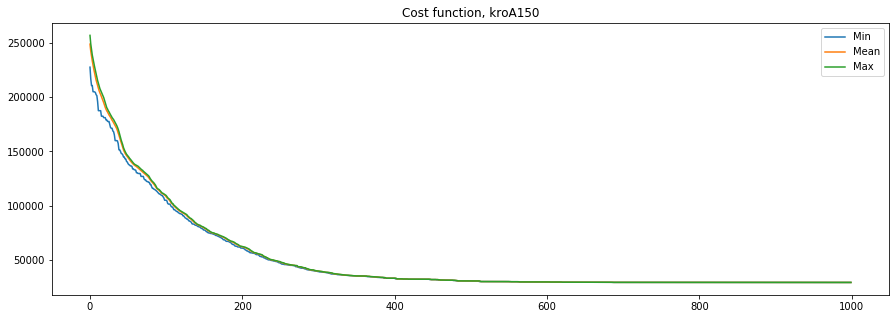

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title(f'Cost function, {name}')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

##### kroA200

In [29]:
def kroA200():
    coords = '''1357 1905
    2650 802
    1774 107
    1307 964
    3806 746
    2687 1353
    43 1957
    3092 1668
    185 1542
    834 629
    40 462
    1183 1391
    2048 1628
    1097 643
    1838 1732
    234 1118
    3314 1881
    737 1285
    779 777
    2312 1949
    2576 189
    3078 1541
    2781 478
    705 1812
    3409 1917
    323 1714
    1660 1556
    3729 1188
    693 1383
    2361 640
    2433 1538
    554 1825
    913 317
    3586 1909
    2636 727
    1000 457
    482 1337
    3704 1082
    3635 1174
    1362 1526
    2049 417
    2552 1909
    3939 640
    219 898
    812 351
    901 1552
    2513 1572
    242 584
    826 1226
    3278 799
    86 1065
    14 454
    1327 1893
    2773 1286
    2469 1838
    3835 963
    1031 428
    3853 1712
    1868 197
    1544 863
    457 1607
    3174 1064
    192 1004
    2318 1925
    2232 1374
    396 828
    2365 1649
    2499 658
    1410 307
    2990 214
    3646 1018
    3394 1028
    1779 90
    1058 372
    2933 1459
    3099 173
    2178 978
    138 1610
    2082 1753
    2302 1127
    805 272
    22 1617
    3213 1085
    99 536
    1533 1780
    3564 676
    29 6
    3808 1375
    2221 291
    3499 1885
    3124 408
    781 671
    1027 1041
    3249 378
    3297 491
    213 220
    721 186
    3736 1542
    868 731
    960 303
    1380 939
    2848 96
    3510 1671
    457 334
    3888 666
    984 965
    2721 1482
    1286 525
    2716 1432
    738 1325
    1251 1832
    2728 1698
    3815 169
    3683 1533
    1247 1945
    123 862
    1234 1946
    252 1240
    611 673
    2576 1676
    928 1700
    53 857
    1807 1711
    274 1420
    2574 946
    178 24
    2678 1825
    1795 962
    3384 1498
    3520 1079
    1256 61
    1424 1728
    3913 192
    3085 1528
    2573 1969
    463 1670
    3875 598
    298 1513
    3479 821
    2542 236
    3955 1743
    1323 280
    3447 1830
    2936 337
    1621 1830
    3373 1646
    1393 1368
    3874 1318
    938 955
    3022 474
    2482 1183
    3854 923
    376 825
    2519 135
    2945 1622
    953 268
    2628 1479
    2097 981
    890 1846
    2139 1806
    2421 1007
    2290 1810
    1115 1052
    2588 302
    327 265
    241 341
    1917 687
    2991 792
    2573 599
    19 674
    3911 1673
    872 1559
    2863 558
    929 1766
    839 620
    3893 102
    2178 1619
    3822 899
    378 1048
    1178 100
    2599 901
    3416 143
    2961 1605
    611 1384
    3113 885
    2597 1830
    2586 1286
    161 906
    1429 134
    742 1025
    1625 1651
    1187 706
    1787 1009
    22 987
    3640 43
    3756 882
    776 392
    1724 1642
    198 1810
    3950 1558
    '''

    n = 200
    coords = np.fromstring(coords, sep=' ')
    coords = coords.reshape((n, 2))

    A = np.empty((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
    return A, n, 'kroA200'

In [30]:
dist_matrix, n, name = kroA200()
history, best_objective_value, best_chromosom = SGA(chromosome_length=n, number_of_iterations=1000, dist_matrix=dist_matrix)

  0     0.32051277 305859.93753353 329454.85326849 338810.15387777 6906.72834499
 10     2.65395927 265871.02263729 288722.42647322 294989.58466679 5840.68960414
 20     4.76297712 239589.30984612 255151.79947958 258725.39244595 2927.76586808
 30     6.68678713 224494.71949903 234864.10232132 238188.61580925 2804.97689613
 40     8.53333616 206612.21813315 214737.67424160 217815.36271948 2402.72735977
 50    10.37723184 197924.45790801 202903.23268873 204463.36506757 1182.34893228
 60    12.19492722 185920.96087729 193310.45394029 195506.72538346 1967.35725913
 70    14.03102565 174575.80008546 180111.24493510 181725.25077407 1280.20699344
 80    15.99922299 162744.28978881 168923.84939804 170420.95207144 1210.25680731
 90    17.93809795 154095.85269994 157484.24283107 159159.73794730 1101.06043665
100    19.86924434 143942.36168863 147515.28768966 148503.33038982 719.53294888
110    21.62050104 138233.18262619 140756.51330883 141869.92883068 761.17164598
120    23.42170906 132804.0077

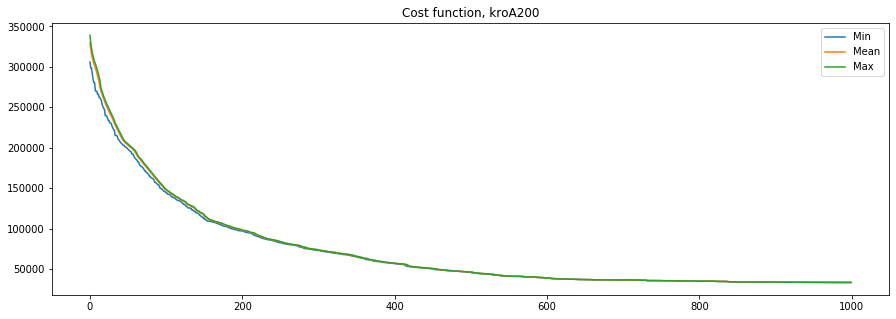

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title(f'Cost function, {name}')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

## Zadanie 2. (4 punkty)
Rozszerz algorytm ewolucyjny dodając lub zmieniając operatory krzyżowania i mutacji
(według własnych pomysłów, można też sprawdzić popularne w literaturze tematu
operatory OX, CX, PBX, OBX, PPX, LCSX, LOX). Przeanalizuj działanie nowego
algorytmu i otrzymane wyniki. 

### OX

![](https://i.imgur.com/uaqFSQJ.png)

In [11]:
def OX(ind1, ind2):
    n = len(ind1)
    a, b = np.random.randint(0, n, 2)
    if a > b:
        a, b = b, a
        
    child1, child2 = np.ones(n,dtype=np.int)*-1, np.ones(n,dtype=np.int)*-1
    child1[a:b+1], child2[a:b+1] = ind1[a:b+1], ind2[a:b+1]
    
    child1_elements, child2_elements = set(child1), set(child2)
    ind1_order = np.array([ind1[i] for i in range(n) if ind1[i] not in child2_elements])
    ind2_order = np.array([ind2[i] for i in range(n) if ind2[i] not in child1_elements])
    
    for i in range(len(ind1_order)):
        j = (b+1+i)%n
        child1[j], child2[j] = ind2_order[i], ind1_order[i]
    
    return child1, child2

  0     0.12770605 23679.13018026 28262.68817271 29569.26136198 979.25035212
 10     1.02828765 18248.59758192 20836.24998338 21551.40384267 567.98723497
 20     2.02943325 14039.45432016 16328.28167110 17020.99255444 553.35548535
 30     3.01970243 12831.48449549 14121.85791239 14481.79731209 277.57312664
 40     3.98515987 11863.60783978 12929.27492588 13251.52304177 301.23689451
 50     4.99442935 11120.55370228 11920.44161252 12149.47177461 167.16439635
 60     5.95470047 10918.72490469 11367.47326492 11561.66717253 145.90532175
 70     6.86431146 10548.02759483 10963.65671491 11105.64395804 129.08399730
 80     7.79850411 10287.11581492 10588.70825925 10655.04913725  69.85109446
 90     8.74526310 9895.76525797 10309.48126260 10408.50388641  82.09191721
100     9.71423936 9486.62793641 9704.82445964 9808.40495641  71.08355187
110    10.70795703 9259.41643905 9409.54126655 9517.34247664  69.24716329
120    11.68147135 9124.46265037 9224.19402258 9264.48546898  32.78330732
130    12

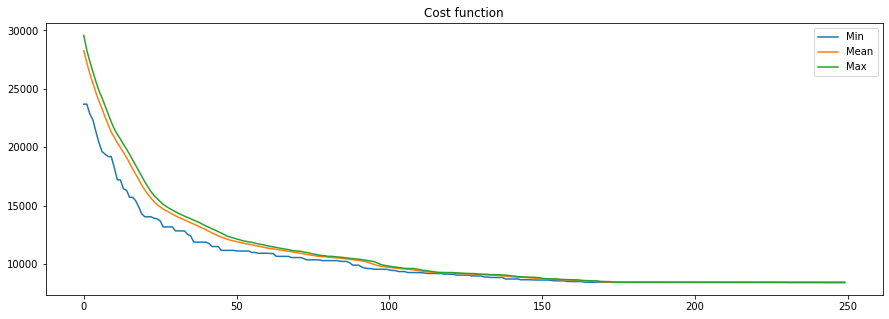

In [74]:
history, best_objective_value, best_chromosom = SGA(crossover=OX)
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### CX

![](https://i.imgur.com/HYX52a9.png)

In [12]:
def CX(ind1, ind2):
    n = len(ind1)
    
    lookup1,lookup2 = np.ones(n,dtype=np.int)*-1,np.ones(n,dtype=np.int)*-1
    for i in range(n):
        lookup1[ind1[i]] = i
        lookup2[ind2[i]] = i
        
    cycle, cycle_elements = [], set()
    idx = np.random.randint(0,n)
    while True:
        cycle.append(ind1[idx])
        cycle_elements.add(ind1[idx])
        idx = lookup1[ind2[idx]]
        if ind1[idx] in cycle_elements:
            break
            
    child1, child2 = np.ones(n,dtype=np.int)*-1, np.ones(n,dtype=np.int)*-1

    for e in cycle:
        child1[lookup1[e]], child2[lookup2[e]] = e, e
    
    ind1_order = np.array([ind1[i] for i in range(n) if ind1[i] not in cycle_elements])
    ind2_order = np.array([ind2[i] for i in range(n) if ind2[i] not in cycle_elements])
    
    k1,k2 = 0,0
    for i in range(n):
        if child1[i] == -1:
            child1[i] = ind2_order[k1]
            k1+=1
            
        if child2[i] == -1:
            child2[i] = ind1_order[k2]
            k2+=1
            
    return child1,child2

  0     0.12566376 24262.40449005 28423.58773471 29744.57767771 1047.96105684
 10     0.93749237 19068.76925795 21337.15029147 22121.39510247 630.19887388
 20     1.80162072 17305.40622786 17777.76845356 18040.64027255 123.27058626
 30     2.56461716 15314.00419469 16334.06170504 16728.86702187 349.99430442
 40     3.34271336 14013.93569245 14650.01280844 14977.38086272 233.79558869
 50     4.12558675 12819.74827910 13168.22570896 13311.29628240 143.85231664
 60     4.87792110 11890.75161084 12281.33495006 12367.20690672  92.64483633
 70     5.65498781 11050.49755351 11301.10913035 11369.45428465  71.87506405
 80     6.46953082 10525.83679206 10640.48353825 10693.27111887  33.08721494
 90     7.31427002 10105.23447798 10303.81212761 10369.76057059  29.89551671
100     8.15942073 9611.82020258 9738.07745444 9878.98731602  46.93271907
110     9.00877047 9446.62365984 9528.73666784 9569.57245152  24.37741005
120     9.85715437 9102.91368002 9188.75550171 9213.78143997  25.19389949
130    

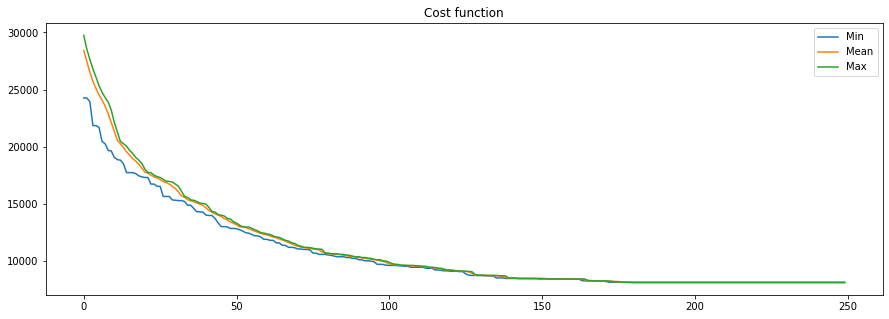

In [75]:
history, best_objective_value, best_chromosom = SGA(crossover=CX)
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### PBX

![](https://i.imgur.com/NN5mENy.png)

In [13]:
def PBX(ind1, ind2):
    n = len(ind1)
    
    r1, r2 = np.random.rand(n) < 0.5, np.random.rand(n) < 0.5
    child1, child2 = np.ones(n,dtype=np.int)*-1, np.ones(n,dtype=np.int)*-1
    child1[r1] = ind1[r1]
    child2[r2] = ind2[r2]
    
    child1_elements, child2_elements = set(child1), set(child2)
    ind1_order = np.array([ind1[i] for i in range(n) if ind1[i] not in child2_elements])
    ind2_order = np.array([ind2[i] for i in range(n) if ind2[i] not in child1_elements])
    
    k1,k2 = 0,0
    for i in range(n):
        if child1[i] == -1:
            child1[i] = ind2_order[k1]
            k1+=1
            
        if child2[i] == -1:
            child2[i] = ind1_order[k2]
            k2+=1
    
    return child1, child2

  0     0.14261794 23405.18319285 28430.73217910 29772.06815462 1048.50100926
 10     1.13995433 22090.10657363 24440.74209918 25316.32795011 746.71145769
 20     2.16276574 19418.67080833 22351.81646560 23094.33856579 627.72584710
 30     3.17172313 17953.24013725 20600.92785397 21413.38852930 634.81379755
 40     4.20054007 16596.88917830 18572.05060462 19063.37655888 477.35761382
 50     5.18492699 15167.49940108 16426.11548925 16827.28517421 314.71413018
 60     6.14957452 14222.04501181 15020.27019635 15281.83275813 210.48821083
 70     7.08061624 13723.82706146 14243.77516934 14411.06305316 126.40956934
 80     8.02409577 13213.00315748 13681.56700984 13800.09807965  95.59938906
 90     8.94005036 12685.47831874 12964.48950031 13042.99642388  50.59940667
100     9.96882629 11526.05790633 11978.41584059 12017.26254830  98.34825920
110    10.87652254 10809.21750687 11089.02805831 11253.10948714 123.31057291
120    11.83829570 10183.28050194 10306.01013851 10349.03274732  27.6777160

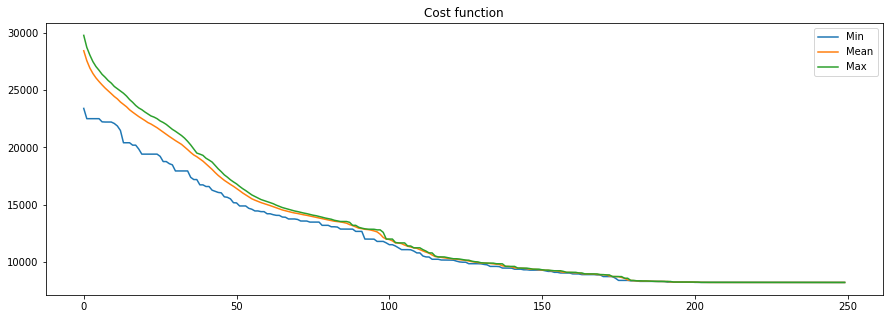

In [30]:
history, best_objective_value, best_chromosom = SGA(crossover=PBX)
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### OBX

![](https://i.imgur.com/pWQQzfj.png)

In [14]:
def OBX(ind1, ind2):
    n = len(ind1)
    
    r1, r2 = np.random.rand(n) < 0.5, np.random.rand(n) < 0.5
    child1, child2 = np.ones(n,dtype=np.int)*-1, np.ones(n,dtype=np.int)*-1
    child1_elements, child2_elements = set(ind1[r1]), set(ind2[r1])

    child1 = np.array([e if e not in child1_elements else -1 for e in ind2])
    child2 = np.array([e if e not in child2_elements else -1 for e in ind1])

    child1[child1==-1] = ind1[r1]
    child2[child2==-1] = ind2[r1]
    
    return child1, child2

  0     0.09275007 24144.17602751 28489.40418531 29907.87456093 1066.11217254
 10     0.56642032 19903.71874774 23506.99828911 24688.56372469 1056.93278403
 20     1.04319310 18398.77779770 20385.22576743 20911.10339309 465.24721309
 30     1.53285599 17191.83680165 18400.18761345 18831.77481075 291.63318537
 40     2.02225614 14744.78730062 16579.07381241 16835.55634264 221.31044368
 50     2.53506160 14704.32130972 15596.23825937 15882.03648226 385.39446455
 60     3.03969979 13065.63353519 13969.41836986 14124.74420449 182.49453596
 70     3.53906679 12245.19993692 12886.64567014 13065.63353519 234.91512416
 80     4.01528788 10951.42937758 11601.63759857 11813.54074293 218.40329655
 90     4.48802376 10461.05323696 10773.41471679 10805.07265635  48.39638194
100     4.97673225 9920.54681935 10280.79174075 10347.81905546  59.18963149
110     5.51898241 9465.90964699 9783.04493491 9784.81681483  16.17795530
120     6.09993720 9030.82490146 9179.39560805 9191.70260840  19.56434779
130 

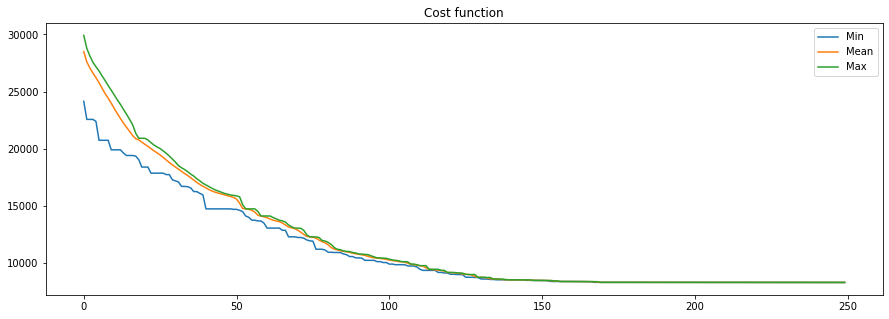

In [37]:
history, best_objective_value, best_chromosom = SGA(crossover=OBX)
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### LOX

![](https://i.imgur.com/itqDpNU.png)

In [15]:
def LOX(ind1, ind2):
    n = len(ind1)
    a, b = np.random.randint(0, n, 2)
    if a > b:
        a, b = b, a
        
    child1, child2 = np.ones(n,dtype=np.int)*-1, np.ones(n,dtype=np.int)*-1
    child1[a:b+1], child2[a:b+1] = ind1[a:b+1], ind2[a:b+1]
    
    child1_elements, child2_elements = set(child1), set(child2)
    ind1_order = np.array([ind1[i] for i in range(n) if ind1[i] not in child2_elements])
    ind2_order = np.array([ind2[i] for i in range(n) if ind2[i] not in child1_elements])
    
    j=0
    for i in range(n):
        if i<a or i>b:
            child1[i], child2[i] = ind2_order[j], ind1_order[j]
            j += 1
    
    return child1, child2

  0     0.14560986 24248.81121842 28399.64713018 29808.74791859 1114.30016741
 10     1.14352417 19270.83531497 21401.18326082 22015.03994069 493.04493195
 20     2.24394226 16204.44594331 18137.83731639 18791.36085311 516.89393616
 30     3.39842558 14150.02446836 15637.47747819 16155.15745447 396.65605845
 40     4.50255489 12610.42238221 13657.23437464 13966.09228966 277.34783192
 50     5.46150661 10982.11691815 11604.73937623 11837.84914977 154.96991174
 60     6.33083344 9877.20847979 10350.76545137 10511.07008521 147.39453875
 70     7.23840666 9048.37700182 9422.73731103 9483.38260106  67.99121386
 80     8.23824000 8529.72756529 8730.99879391 8798.07602258  50.86486492
 90     9.13595986 8399.74276358 8452.44840139 8475.71143298   9.49853023
100    10.10941505 8308.20854953 8310.30959304 8310.31803096   0.13314822
110    11.11297870 8307.91224018 8307.91224018 8307.91224018   0.00000000
120    12.08669853 7710.75016636 7710.75016636 7710.75016636   0.00000000
130    13.1079344

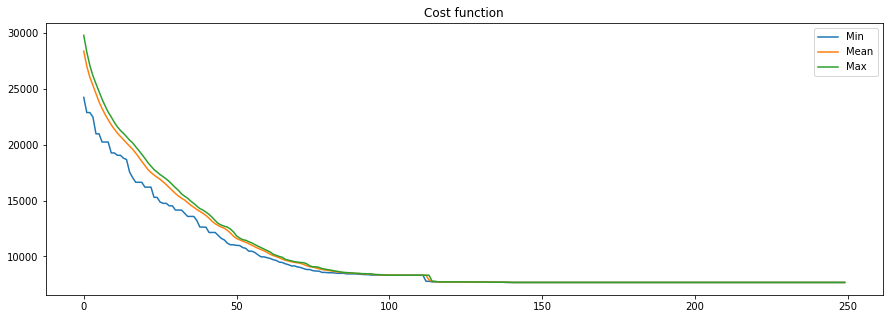

In [77]:
history, best_objective_value, best_chromosom = SGA(crossover=LOX)
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

## Zadanie 3. (4 punkty)
Spróbuj ulepszyć algorytm ewolucyjny z Zadania 1 wprowadzając dodatkową mutację
polegającą na przeszukiwaniu lokalnym (dla danej permutacji początkowej, sprawdzamy
wszystkie permutacje różniące się od niej na nie więcej niż K pozycjach i permutację
początkową zamieniamy na najlepszą znalezioną) i iterowanym przeszukiwaniu lokalnym
(dla danej permutacji początkowej, sprawdzamy wszystkie permutacje różniące się od niej
na nie więcej niż K pozycjach, permutację początkową zamieniamy na najlepszą
znalezioną i powtarzamy procedurę dopóki możliwa jest poprawa rozwiązania).

In [68]:
def swap(p, K):
    
    all_perms = set()
    all_perms.add(tuple(p))
    
    for _ in range(K//2):
        
        ans = set()
        
        for p in all_perms:
            for i in range(len(p)):
                for j in range(i+1,len(p)):
                    new = np.array(p)
                    new[i], new[j] = new[j], new[i]
                    ans.add(tuple(new))
                    
        all_perms = all_perms.union(ans)

    return all_perms

def local_search(p, obj_function, distance_matrix, K=2):
    neighbors = np.array(list(map(np.array, list(swap(p,K)))))
    objective_values = obj_function(neighbors, distance_matrix)
    return neighbors[objective_values.argmin()]

def iterative_local_search(p, obj_function, distance_matrix, K=2):
    act_best = obj_function(np.array([p]), distance_matrix)[0]
    act_p = p
    while True:
        neighbors = np.array(list(map(np.array, list(swap(act_p,K)))))
        objective_values = obj_function(neighbors, distance_matrix)
        if objective_values.min() > act_best:
            break
        act_p = neighbors[objective_values.argmin()]
    return act_p

### Local search, K = 2

  0     3.74046350 23890.83676445 28367.32783139 29766.77955539 1121.70494231
 10    41.88519812 19096.96144632 22207.36684489 23193.55547331 780.48847566
 20    78.64395547 16552.97778276 17928.72257560 18341.71411298 313.93961278
 30   119.17409468 14890.37149944 15895.59174140 16193.21396797 249.55785905
 40   156.21690536 13819.24006757 14175.46155944 14272.65743377 103.96170903
 50   194.95690989 12562.30174641 12887.75300096 12968.59135348  62.46204142
 60   234.30599689 11287.75873526 11391.08935344 11442.12598824  22.37790791
 70   273.80238986 10398.49899851 10539.45383840 10578.51983396  51.13408135
 80   314.97026515 10339.78830348 10339.78830348 10339.78830348   0.00000000
 90   353.27449131 10182.94004161 10182.94004161 10182.94004161   0.00000000
100   390.86268234 10182.94004161 10182.94004161 10182.94004161   0.00000000
110   430.78052902 10182.94004161 10182.94004161 10182.94004161   0.00000000
120   470.55736804 10182.94004161 10182.94004161 10182.94004161   0.0000000

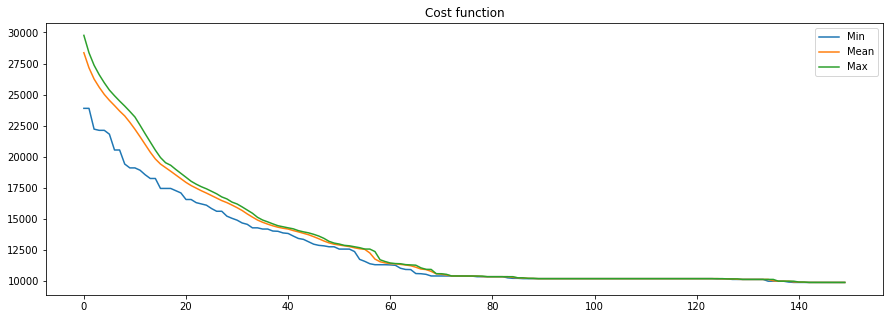

In [97]:
history, best_objective_value, best_chromosom = SGA(
    number_of_iterations = 150,
    mutation = lambda p: local_search(reverse_sequence_mutation(p), tsp_objective_function, A, 2))
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### Local search, K = 4

In [ ]:
history, best_objective_value, best_chromosom = SGA(
    number_of_iterations = 150,
    mutation = lambda p: local_search(reverse_sequence_mutation(p), tsp_objective_function, A, 4))
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### Iterative local search, K = 2

  0     5.09733701 24733.22092428 28279.21190030 29597.63451291 1021.57977375
 10    51.87641144 19397.09571604 21926.18338777 22756.98575745 617.08307061
 20    98.49905252 15661.09378243 17657.26722698 18061.33250740 331.79824929
 30   142.85353923 13569.26161869 14827.86760998 15164.22599706 308.24050298
 40   188.43047214 11746.00854391 12830.70970548 13113.72877204 225.37248981
 50   234.14790845 10662.97782173 10906.48002630 11021.71464002  87.38278027
 60   278.98533130 10101.80740236 10269.50032806 10286.64845232  30.72006021
 70   324.53846169 9657.82639494 9810.58161876 9864.53243796  43.80258613
 80   369.43086362 9357.49626304 9472.81770935 9495.40499338  22.69300403
 90   413.97515845 8688.44048610 8965.28279468 9009.36906220  47.95807435
100   457.95836115 8415.41085982 8488.43219032 8506.10514972  32.67099361
110   504.45776415 8397.49513381 8402.42804446 8402.43793005   0.22082741
120   549.91103458 8296.47837274 8388.43561377 8388.61989682   4.11657147
130   595.174619

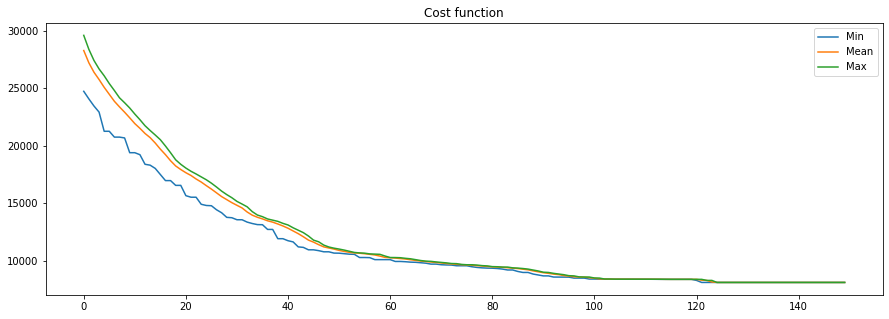

In [82]:
history, best_objective_value, best_chromosom = SGA(
    number_of_iterations = 150,
    mutation = lambda p: iterative_local_search(reverse_sequence_mutation(p), tsp_objective_function, A, 2))
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

### Iterative local search, K = 4

In [ ]:
history, best_objective_value, best_chromosom = SGA(
    number_of_iterations = 150,
    mutation = lambda p: iterative_local_search(reverse_sequence_mutation(p), tsp_objective_function, A, 4))
plt.figure(figsize=(15, 5))
plt.plot(history)
plt.title('Cost function')
plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
plt.show()

## Zadanie 4. (4 punkty)
Wykorzystaj zaimplementowany algorytm do rozwiązywania problemu QAP. Użyj danych
testowych z biblioteki QAPLIB. Przeprowadź obliczenia co najmniej dla następujących
zestawów danych: Nug12, Nug14, … Nug30, Tai50a, Tai60a, Tai80a. Przeanalizuj
działanie algorytmu i otrzymane wyniki. 

In [30]:
def qap_objective_function(p, A, B):
    n = len(p)
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p, p[i]]).sum()
    return s

In [19]:
def QAP_data(name):
    URL = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/{name}.dat'
    file = urllib.request.urlopen(URL)
    n = int(file.readline().decode()[:-1].split()[0])

    A = np.empty((n, n))
    file.readline()
    for i in range(n):
        line = file.readline()
        if len(line) < 2:
            continue
        A[i, :] = list(map(int, line.decode()[:-1].split()))
        
    B = np.empty((n, n))
    file.readline()
    for i in range(n):
        line = file.readline()
        if len(line) < 2:
            continue
        B[i, :] = list(map(int, line.decode()[:-1].split()))
        
    return n, A, B

In [22]:
data = []

for i in range(12, 30):
    try:
        data.append((f'nug{i}',QAP_data(f'nug{i}')))
        print(f'Nug {i} downloaded')
    except HTTPError:
        print(f'Nug {i} skipped')
        
tais = ["tai50a", "tai60a", "tai80a"]
for tai in tais:
    try:
        data.append((tai,QAP_data(tai)))
        print(f'{tai} downloaded')
    except HTTPError:
        print(f'{tai} skipped')

Nug 12 downloaded
Nug 13 skipped
Nug 14 downloaded
Nug 15 downloaded
Nug 16 skipped
Nug 17 downloaded
Nug 18 downloaded
Nug 19 skipped
Nug 20 downloaded
Nug 21 downloaded
Nug 22 downloaded
Nug 23 skipped
Nug 24 downloaded
Nug 25 downloaded
Nug 26 skipped
Nug 27 downloaded
Nug 28 downloaded
Nug 29 skipped
tai50a downloaded
tai60a downloaded
tai80a downloaded


In [36]:
Optimal = {
    'nug12': 578,
'nug14': 1014,
'nug15':  1150,
'nug16a':  1610, 
'nug16b':  1240,
'nug17' : 1732,
'nug18' : 1930,
'nug20': 2570,
'nug21' : 2438, 
'nug22' : 3596,
'nug24' : 3488,
'nug25' : 3744,
'nug27' : 5234,
'nug28' : 5166,
'nug30' : 6124,
'tai50a' : 4390920,
'tai60a': 6325978,
'tai80a': 11657010, 
}

  0     0.11273241 660.00000000 768.49600000 808.00000000  28.99920661
 10     0.77295732 586.00000000 634.26800000 656.00000000  16.35800037
 20     1.42924404 578.00000000 578.00000000 578.00000000   0.00000000
 30     2.08563876 578.00000000 578.00000000 578.00000000   0.00000000
 40     2.74590039 578.00000000 578.00000000 578.00000000   0.00000000
 50     3.43183851 578.00000000 578.00000000 578.00000000   0.00000000
 60     4.06569839 578.00000000 578.00000000 578.00000000   0.00000000
 70     4.70034313 578.00000000 578.00000000 578.00000000   0.00000000
 80     5.35252190 578.00000000 578.00000000 578.00000000   0.00000000
 90     5.99277639 578.00000000 578.00000000 578.00000000   0.00000000
100     6.61741877 578.00000000 578.00000000 578.00000000   0.00000000
110     7.27127266 578.00000000 578.00000000 578.00000000   0.00000000
120     7.96834826 578.00000000 578.00000000 578.00000000   0.00000000
130     8.59383011 578.00000000 578.00000000 578.00000000   0.00000000
140   

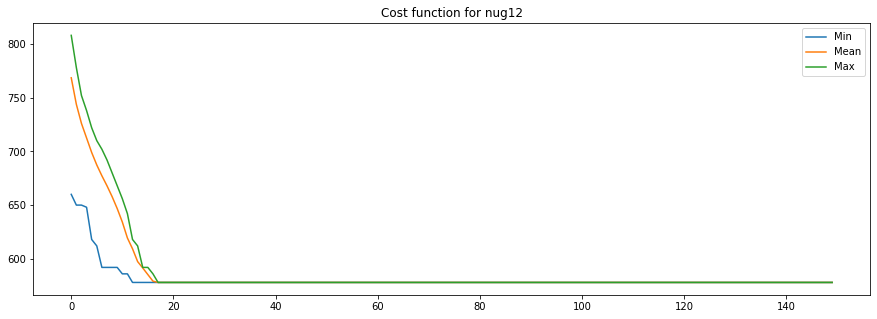

  0     0.12868810 1170.00000000 1308.13600000 1358.00000000  37.67966964
 10     0.86881208 1064.00000000 1142.96800000 1172.00000000  21.01825340
 20     1.59879375 1064.00000000 1064.00000000 1064.00000000   0.00000000
 30     2.30343151 1064.00000000 1064.00000000 1064.00000000   0.00000000
 40     3.01853323 1064.00000000 1064.00000000 1064.00000000   0.00000000
 50     3.73137856 1064.00000000 1064.00000000 1064.00000000   0.00000000
 60     4.41260934 1064.00000000 1064.00000000 1064.00000000   0.00000000
 70     5.12739944 1064.00000000 1064.00000000 1064.00000000   0.00000000
 80     5.83208632 1064.00000000 1064.00000000 1064.00000000   0.00000000
 90     6.53159904 1064.00000000 1064.00000000 1064.00000000   0.00000000
100     7.24448442 1064.00000000 1064.00000000 1064.00000000   0.00000000
110     8.02894521 1064.00000000 1064.00000000 1064.00000000   0.00000000
120     8.79589343 1064.00000000 1064.00000000 1064.00000000   0.00000000
130     9.58398318 1064.00000000 1064.

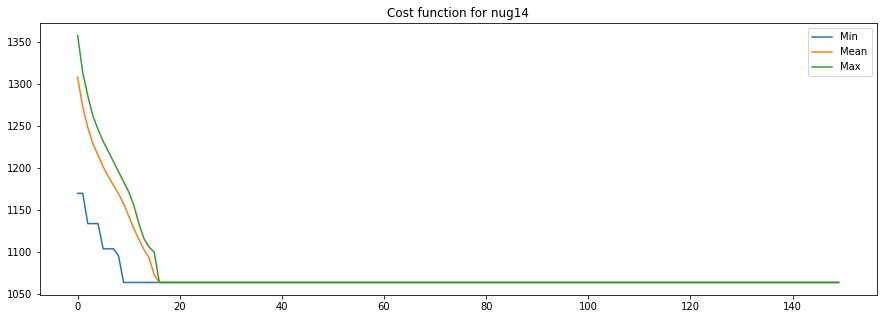

  0     0.15358758 1292.00000000 1513.24800000 1578.00000000  50.62784309
 10     0.99660301 1194.00000000 1227.43600000 1264.00000000  21.55462605
 20     1.76155734 1194.00000000 1194.00000000 1194.00000000   0.00000000
 30     2.51821351 1194.00000000 1194.00000000 1194.00000000   0.00000000
 40     3.26328850 1194.00000000 1194.00000000 1194.00000000   0.00000000
 50     4.01578879 1194.00000000 1194.00000000 1194.00000000   0.00000000
 60     4.80545568 1194.00000000 1194.00000000 1194.00000000   0.00000000
 70     5.56365132 1194.00000000 1194.00000000 1194.00000000   0.00000000
 80     6.32293248 1194.00000000 1194.00000000 1194.00000000   0.00000000
 90     7.07097244 1194.00000000 1194.00000000 1194.00000000   0.00000000
100     7.81256938 1194.00000000 1194.00000000 1194.00000000   0.00000000
110     8.56256318 1194.00000000 1194.00000000 1194.00000000   0.00000000
120     9.30438614 1194.00000000 1194.00000000 1194.00000000   0.00000000
130    10.05838394 1194.00000000 1194.

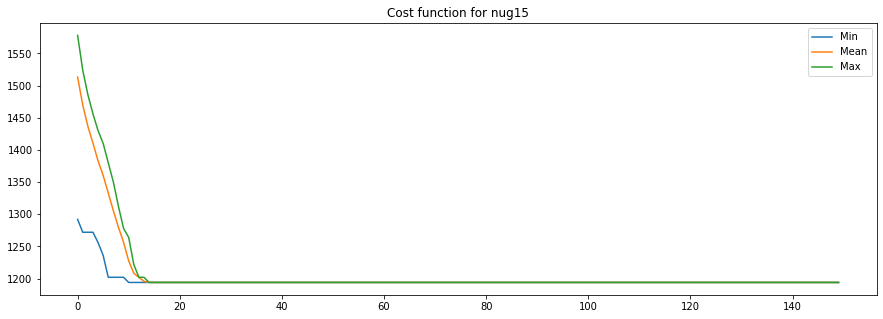

  0     0.18152189 2012.00000000 2235.92000000 2308.00000000  53.76461290
 10     1.04770756 1840.00000000 1963.32400000 2008.00000000  31.46679240
 20     2.02668309 1790.00000000 1835.99600000 1852.00000000  14.48336922
 30     2.93279314 1778.00000000 1778.00000000 1778.00000000   0.00000000
 40     3.79655290 1778.00000000 1778.00000000 1778.00000000   0.00000000
 50     4.61974525 1778.00000000 1778.00000000 1778.00000000   0.00000000
 60     5.44478655 1778.00000000 1778.00000000 1778.00000000   0.00000000
 70     6.24667335 1778.00000000 1778.00000000 1778.00000000   0.00000000
 80     7.05565834 1778.00000000 1778.00000000 1778.00000000   0.00000000
 90     7.98217869 1778.00000000 1778.00000000 1778.00000000   0.00000000
100     8.90241098 1778.00000000 1778.00000000 1778.00000000   0.00000000
110     9.97986174 1778.00000000 1778.00000000 1778.00000000   0.00000000
120    10.91040707 1778.00000000 1778.00000000 1778.00000000   0.00000000
130    11.77375507 1778.00000000 1778.

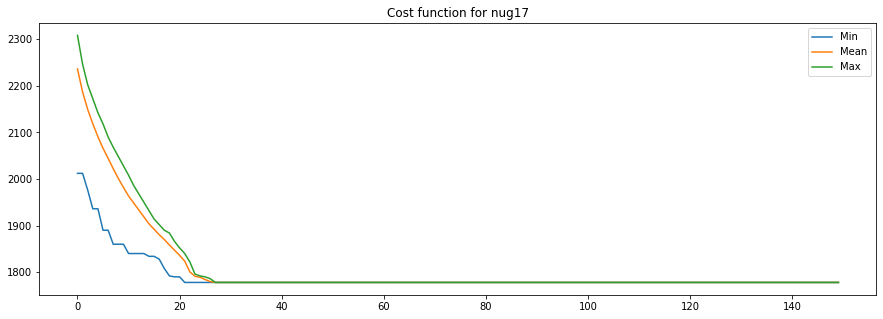

  0     0.16457868 2252.00000000 2470.14800000 2550.00000000  58.90618046
 10     1.07022667 2110.00000000 2188.54000000 2238.00000000  30.78993992
 20     2.03495002 2034.00000000 2038.80800000 2062.00000000  10.48671235
 30     3.18440771 2034.00000000 2034.00000000 2034.00000000   0.00000000
 40     4.31287313 2034.00000000 2034.00000000 2034.00000000   0.00000000
 50     5.54556632 2034.00000000 2034.00000000 2034.00000000   0.00000000
 60     6.54113841 2034.00000000 2034.00000000 2034.00000000   0.00000000
 70     7.46270561 2034.00000000 2034.00000000 2034.00000000   0.00000000
 80     8.32714462 2034.00000000 2034.00000000 2034.00000000   0.00000000
 90     9.32852101 2034.00000000 2034.00000000 2034.00000000   0.00000000
100    10.29898238 2034.00000000 2034.00000000 2034.00000000   0.00000000
110    11.22148466 2034.00000000 2034.00000000 2034.00000000   0.00000000
120    12.15614080 2034.00000000 2034.00000000 2034.00000000   0.00000000
130    13.10952926 2034.00000000 2034.

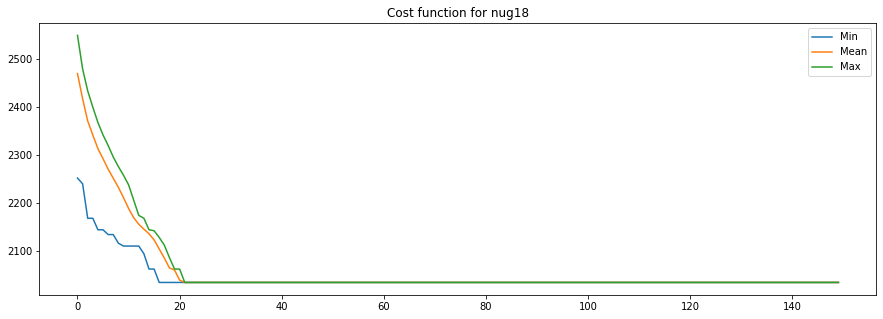

  0     0.22537184 2986.00000000 3304.42400000 3398.00000000  74.97463720
 10     1.19979548 2776.00000000 2949.42000000 3004.00000000  48.27446116
 20     2.30502605 2698.00000000 2748.14800000 2768.00000000  11.36600616
 30     3.23501348 2686.00000000 2686.00000000 2686.00000000   0.00000000
 40     4.16851306 2686.00000000 2686.00000000 2686.00000000   0.00000000
 50     5.12632132 2686.00000000 2686.00000000 2686.00000000   0.00000000
 60     6.06583929 2686.00000000 2686.00000000 2686.00000000   0.00000000
 70     7.01602459 2686.00000000 2686.00000000 2686.00000000   0.00000000
 80     7.99484372 2686.00000000 2686.00000000 2686.00000000   0.00000000
 90     8.98136473 2686.00000000 2686.00000000 2686.00000000   0.00000000
100     9.98273015 2686.00000000 2686.00000000 2686.00000000   0.00000000
110    10.91881657 2686.00000000 2686.00000000 2686.00000000   0.00000000
120    11.87602234 2686.00000000 2686.00000000 2686.00000000   0.00000000
130    12.82897949 2686.00000000 2686.

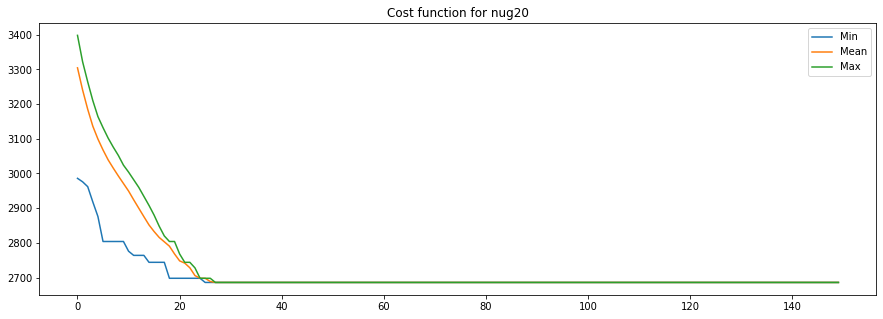

  0     0.20345736 2996.00000000 3288.20800000 3396.00000000  83.82546592
 10     1.49702835 2712.00000000 2874.50000000 2950.00000000  55.02797470
 20     2.63357425 2580.00000000 2619.60000000 2640.00000000  13.16540922
 30     3.70720983 2512.00000000 2525.17200000 2530.00000000   4.22686834
 40     4.84912491 2510.00000000 2510.00000000 2510.00000000   0.00000000
 50     5.91443253 2510.00000000 2510.00000000 2510.00000000   0.00000000
 60     6.97964883 2510.00000000 2510.00000000 2510.00000000   0.00000000
 70     8.04026651 2510.00000000 2510.00000000 2510.00000000   0.00000000
 80     9.07358289 2510.00000000 2510.00000000 2510.00000000   0.00000000
 90    10.09277749 2510.00000000 2510.00000000 2510.00000000   0.00000000
100    11.22378612 2510.00000000 2510.00000000 2510.00000000   0.00000000
110    12.28609800 2510.00000000 2510.00000000 2510.00000000   0.00000000
120    13.40659356 2510.00000000 2510.00000000 2510.00000000   0.00000000
130    14.39271951 2510.00000000 2510.

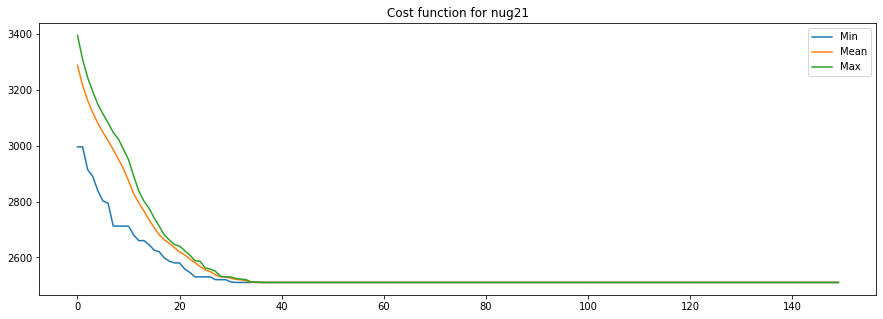

  0     0.27925348 4366.00000000 4952.21600000 5148.00000000 142.62583687
 10     1.37567592 3970.00000000 4205.06000000 4312.00000000  70.34421369
 20     2.41680551 3778.00000000 3843.70400000 3858.00000000  14.41139771
 30     3.50102520 3702.00000000 3720.87200000 3728.00000000   6.73673630
 40     4.54985332 3690.00000000 3690.00000000 3690.00000000   0.00000000
 50     5.61428380 3690.00000000 3690.00000000 3690.00000000   0.00000000
 60     6.62887120 3690.00000000 3690.00000000 3690.00000000   0.00000000
 70     7.65281749 3690.00000000 3690.00000000 3690.00000000   0.00000000
 80     8.71020293 3690.00000000 3690.00000000 3690.00000000   0.00000000
 90     9.76346326 3690.00000000 3690.00000000 3690.00000000   0.00000000
100    10.76824069 3690.00000000 3690.00000000 3690.00000000   0.00000000
110    11.80266476 3690.00000000 3690.00000000 3690.00000000   0.00000000
120    12.88033676 3690.00000000 3690.00000000 3690.00000000   0.00000000
130    14.23133659 3690.00000000 3690.

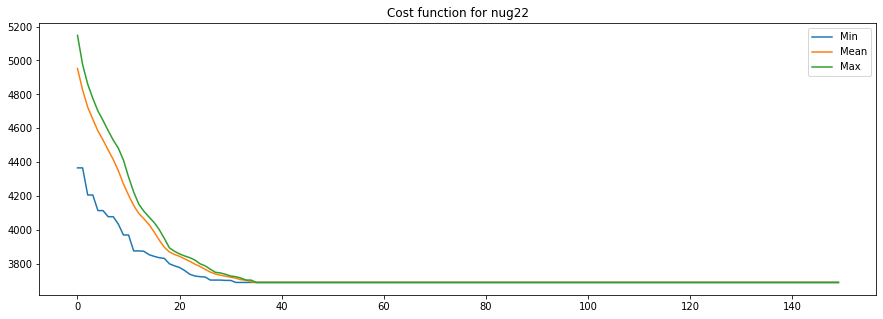

  0     0.26030421 4192.00000000 4622.94800000 4748.00000000  93.18929818
 10     1.56184602 3980.00000000 4174.46000000 4228.00000000  46.05914024
 20     2.73040342 3832.00000000 3926.44400000 3972.00000000  29.67778401
 30     3.87006187 3676.00000000 3693.30800000 3706.00000000  11.42808540
 40     4.96221447 3676.00000000 3676.00000000 3676.00000000   0.00000000
 50     6.04798007 3676.00000000 3676.00000000 3676.00000000   0.00000000
 60     7.15511799 3676.00000000 3676.00000000 3676.00000000   0.00000000
 70     8.30409670 3676.00000000 3676.00000000 3676.00000000   0.00000000
 80     9.46903610 3676.00000000 3676.00000000 3676.00000000   0.00000000
 90    10.58749628 3676.00000000 3676.00000000 3676.00000000   0.00000000
100    11.70615649 3676.00000000 3676.00000000 3676.00000000   0.00000000
110    12.78223705 3676.00000000 3676.00000000 3676.00000000   0.00000000
120    13.88995695 3676.00000000 3676.00000000 3676.00000000   0.00000000
130    15.01418805 3676.00000000 3676.

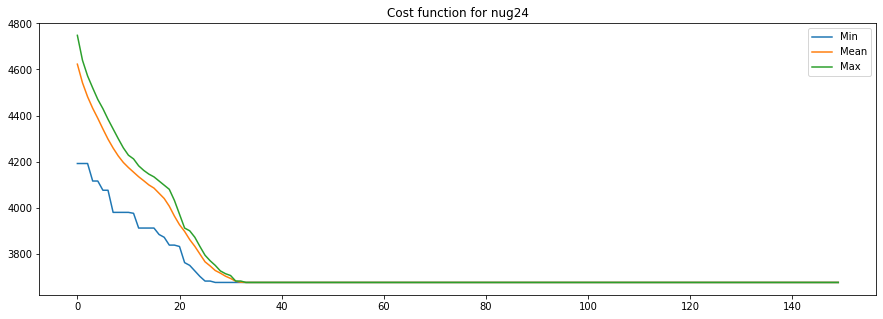

  0     0.21204591 4516.00000000 4866.32800000 4986.00000000  91.17080901
 10     1.43189502 4264.00000000 4457.27200000 4524.00000000  50.35059102
 20     2.61176181 4158.00000000 4216.78000000 4232.00000000  17.10413985
 30     3.78430557 4006.00000000 4045.94800000 4056.00000000  11.06875314
 40     4.92931890 3984.00000000 3984.00000000 3984.00000000   0.00000000
 50     6.07555461 3984.00000000 3984.00000000 3984.00000000   0.00000000
 60     7.23203254 3984.00000000 3984.00000000 3984.00000000   0.00000000
 70     8.34397006 3984.00000000 3984.00000000 3984.00000000   0.00000000
 80     9.53380322 3984.00000000 3984.00000000 3984.00000000   0.00000000
 90    10.78134608 3984.00000000 3984.00000000 3984.00000000   0.00000000
100    12.02188659 3984.00000000 3984.00000000 3984.00000000   0.00000000
110    13.30171227 3984.00000000 3984.00000000 3984.00000000   0.00000000
120    14.47458148 3984.00000000 3984.00000000 3984.00000000   0.00000000
130    15.69490767 3984.00000000 3984.

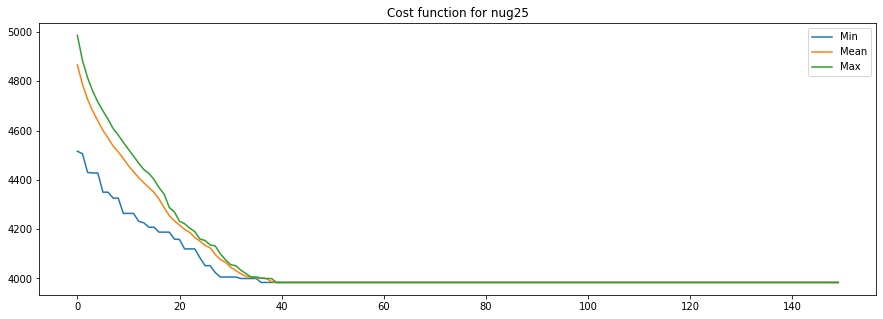

  0     0.27803779 6472.00000000 6901.84400000 7092.00000000 137.34860634
 10     1.66064048 5936.00000000 6264.22800000 6368.00000000  74.60308315
 20     2.95427251 5674.00000000 5851.84400000 5916.00000000  49.65367725
 30     4.22643971 5514.00000000 5547.83200000 5570.00000000  13.77547734
 40     5.49664283 5438.00000000 5438.00000000 5438.00000000   0.00000000
 50     6.75084066 5406.00000000 5406.00000000 5406.00000000   0.00000000
 60     7.96067572 5406.00000000 5406.00000000 5406.00000000   0.00000000
 70     9.16285872 5406.00000000 5406.00000000 5406.00000000   0.00000000
 80    10.37439942 5406.00000000 5406.00000000 5406.00000000   0.00000000
 90    11.60108495 5406.00000000 5406.00000000 5406.00000000   0.00000000
100    12.79513526 5406.00000000 5406.00000000 5406.00000000   0.00000000
110    14.03144145 5406.00000000 5406.00000000 5406.00000000   0.00000000
120    15.33907771 5406.00000000 5406.00000000 5406.00000000   0.00000000
130    16.67720318 5406.00000000 5406.

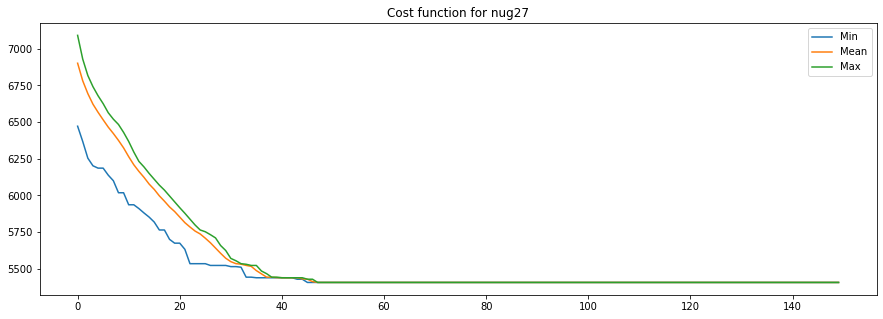

  0     0.23540449 6352.00000000 6738.99600000 6904.00000000 113.26270341
 10     1.53591204 5944.00000000 6206.94800000 6300.00000000  71.13663821
 20     2.91926956 5758.00000000 5847.22400000 5868.00000000  20.38405808
 30     4.33878255 5522.00000000 5620.38800000 5654.00000000  22.89527148
 40     5.71461153 5442.00000000 5455.70400000 5460.00000000   6.15470422
 50     7.15070033 5442.00000000 5442.00000000 5442.00000000   0.00000000
 60     8.53164959 5442.00000000 5442.00000000 5442.00000000   0.00000000
 70     9.96348238 5442.00000000 5442.00000000 5442.00000000   0.00000000
 80    11.35163045 5442.00000000 5442.00000000 5442.00000000   0.00000000
 90    12.70225573 5442.00000000 5442.00000000 5442.00000000   0.00000000
100    13.98951554 5442.00000000 5442.00000000 5442.00000000   0.00000000
110    15.27220964 5442.00000000 5442.00000000 5442.00000000   0.00000000
120    16.59667420 5442.00000000 5442.00000000 5442.00000000   0.00000000
130    17.87753606 5442.00000000 5442.

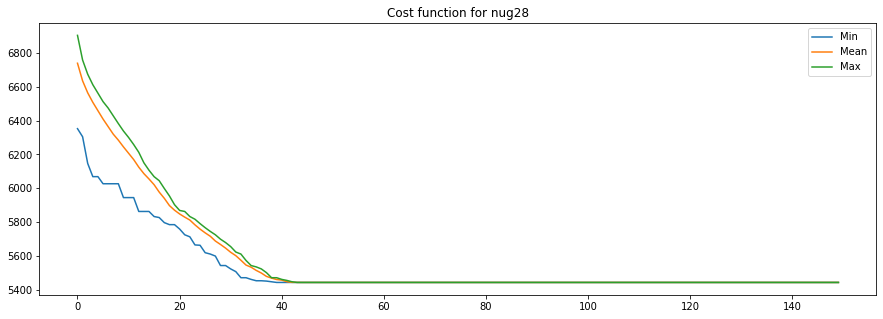

  0     0.37947249 5416577.00000000 5516342.20000000 5550825.00000000 25523.67640298
 10     2.55248046 5305510.00000000 5371121.84600000 5391019.00000000 17561.18564546
 20     4.63967395 5196861.00000000 5237344.34600000 5248784.00000000 11200.53208746
 30     6.79817867 5120286.00000000 5139535.91000000 5142463.00000000 6390.66332034
 40     8.90557718 5097208.00000000 5100317.21400000 5109449.00000000 5328.47791365
 50    11.07132077 5090655.00000000 5092083.55400000 5097208.00000000 2705.65109190
 60    13.41662359 5081863.00000000 5081863.00000000 5081863.00000000   0.00000000
 70    15.67282867 5081863.00000000 5081863.00000000 5081863.00000000   0.00000000
 80    17.96885633 5081863.00000000 5081863.00000000 5081863.00000000   0.00000000
 90    20.30736637 5081863.00000000 5081863.00000000 5081863.00000000   0.00000000
100    22.71593833 5081863.00000000 5081863.00000000 5081863.00000000   0.00000000
110    24.89209366 5081863.00000000 5081863.00000000 5081863.00000000   0.0000

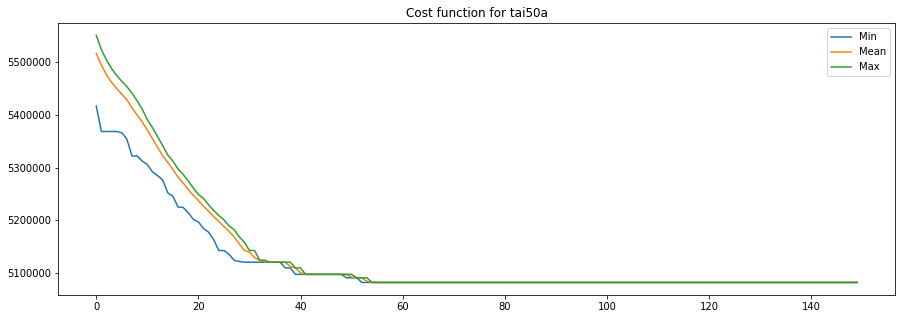

  0     0.46474290 7930311.00000000 8056117.28600000 8095114.00000000 30336.99880279
 10     3.40107059 7833021.00000000 7929665.43200000 7954319.00000000 20809.19305426
 20     6.40157557 7720929.00000000 7800195.86000000 7826538.00000000 21131.38892587
 30    10.45793271 7640092.00000000 7671728.23000000 7681976.00000000 7694.67604965
 40    13.98595738 7621348.00000000 7629810.10000000 7630050.00000000 836.94444141
 50    16.64246631 7609681.00000000 7609681.00000000 7609681.00000000   0.00000000
 60    19.50650048 7609681.00000000 7609681.00000000 7609681.00000000   0.00000000
 70    22.73373866 7609681.00000000 7609681.00000000 7609681.00000000   0.00000000
 80    25.60738206 7609681.00000000 7609681.00000000 7609681.00000000   0.00000000
 90    28.20426035 7609681.00000000 7609681.00000000 7609681.00000000   0.00000000
100    30.67533374 7609681.00000000 7609681.00000000 7609681.00000000   0.00000000
110    33.12048626 7609681.00000000 7609681.00000000 7609681.00000000   0.000000

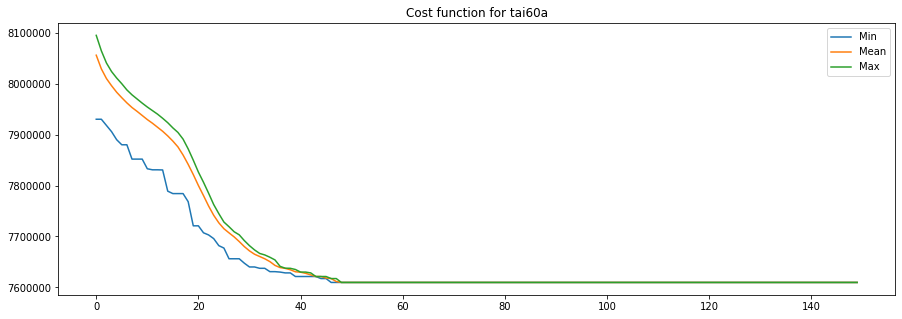

  0     0.61737871 14811440.00000000 15014631.62000000 15066248.00000000 43364.10977068
 10     3.97731996 14684451.00000000 14778860.18400000 14818146.00000000 31279.28772652
 20     7.30327344 14547188.00000000 14627356.53400000 14643528.00000000 14247.31489821
 30    10.66483498 14473503.00000000 14495906.73200000 14505634.00000000 7646.30029388
 40    14.01071358 14456829.00000000 14456829.00000000 14456829.00000000   0.00000000
 50    17.37578988 14451257.00000000 14451257.00000000 14451257.00000000   0.00000000
 60    20.66247845 14402962.00000000 14426757.27800000 14434618.00000000 5094.81386438
 70    23.99432540 14360531.00000000 14384430.49800000 14384575.00000000 1625.05284775
 80    27.64262533 14343692.00000000 14343692.00000000 14343692.00000000   0.00000000
 90    31.11719346 14332285.00000000 14332285.00000000 14332285.00000000   0.00000000
100    34.46974039 14327619.00000000 14327619.00000000 14327619.00000000   0.00000000
110    37.78024888 14323303.00000000 14323303

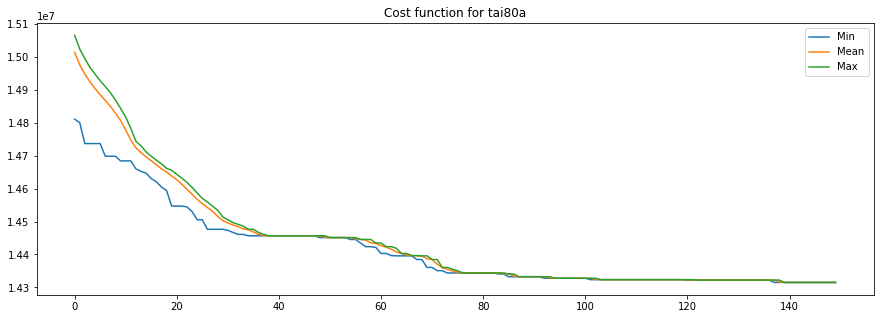

In [51]:
for name, qap_data in data:
    n,A,B = qap_data
    history, best_objective_value, best_chromosom = SGA(
        population_size = 500,
        chromosome_length = n,
        number_of_offspring = 500,
        crossover_probability = 0.95,
        mutation_probability = 0.25,
        number_of_iterations = 150,
        mutation = reverse_sequence_mutation,
        dist_matrix = B,
        objective_function = lambda p, dist: qap_objective_function(p, A, dist),
        crossover = PMX)
    
    print(f'Best result for {name}: {best_objective_value}, optimal (or best known): {Optimal[name]}')
    plt.figure(figsize=(15, 5))
    plt.plot(history)
    plt.title(f'Cost function for {name}')
    plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
    plt.show()

## Zadanie 5. (nieobowiązkowe - 4 punkty bonusowe)
Wykorzystaj zaimplementowane algorytmy do rozwiązywania problemu Q3AP. Użyj
(odpowiednio przekształconych – patrz notatka o problemach QAP i Q3AP) danych
testowych z biblioteki QAPLIB. Przeprowadź obliczenia co najmniej dla następujących
zestawów danych: Nug12, … Nug30. Przeanalizuj działanie algorytmu i otrzymane wyniki. 